In [33]:
import lightgbm as lgb 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np 
import pandas as pd 
import os 
import sys 
sys.path.append('src/')
from feature_generation import feature_generation 
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score 
import xgboost as xgb
from model_train_eval import lgb_cv_eval
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA 

In [34]:
train_data = np.load('训练集/train_x.npy')
train_label = np.load('训练集/train_y.npy')
test_data = np.load('测试集A/test_x_A.npy')
sample_submit = pd.read_csv('测试集A/submit_example_A.csv', index_col=0)

In [35]:
train_fg = feature_generation(train_data)
train_fg.get_feature()
train_fg.feature_concat()
train_data = train_fg.X
train_feature_name = train_fg.feature_name
print(train_data.shape)

test_fg = feature_generation(test_data)
test_fg.get_feature()
test_fg.feature_concat()
test_data = test_fg.X
test_feature_name = test_fg.feature_name
print(test_data.shape)

(37549, 910)
(1155, 910)


In [36]:
## 加入穿越特征

pca = PCA(n_components=30).fit(np.concatenate([train_data, test_data], axis = 0))
print(pca.explained_variance_ratio_)

pca_train = pca.transform(train_data)
pca_test = pca.transform(test_data)

[8.18309299e-01 6.04292973e-02 2.30876036e-02 1.54643100e-02
 1.13170593e-02 8.26388851e-03 6.04395535e-03 4.67163264e-03
 4.33372097e-03 3.44668989e-03 3.26828976e-03 2.76331890e-03
 2.32803108e-03 2.16608419e-03 1.79626866e-03 1.53122965e-03
 1.47084998e-03 1.35548442e-03 1.26819332e-03 1.11897449e-03
 9.31836713e-04 8.55469101e-04 7.89372813e-04 7.71928571e-04
 7.35252246e-04 6.97853982e-04 6.82067772e-04 6.63695045e-04
 6.60918295e-04 6.50969029e-04]


In [38]:
train_data = np.concatenate([train_data, pca_train], axis = 1)
test_data = np.concatenate([test_data, pca_test], axis = 1)
print(train_data.shape, test_data.shape)

(37549, 940) (1155, 940)


fold 0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.133482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 95672
[LightGBM] [Info] Number of data points in the train set: 33794, number of used features: 940
[LightGBM] [Info] Start training from score -0.230874
[LightGBM] [Info] Start training from score -1.579099


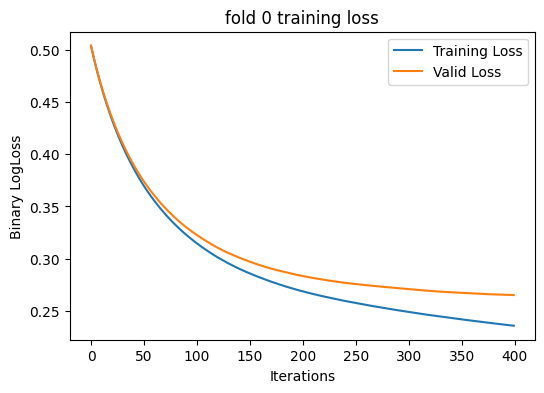

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2981
           1       0.79      0.67      0.72       774

    accuracy                           0.89      3755
   macro avg       0.85      0.81      0.83      3755
weighted avg       0.89      0.89      0.89      3755

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     26827
           1       0.83      0.72      0.77      6967

    accuracy                           0.91     33794
   macro avg       0.88      0.84      0.86     33794
weighted avg       0.91      0.91      0.91     33794

fold 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.133068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 95648
[LightGBM] [Info] Number of data points in the train set: 33794, number of used features: 940
[LightGBM] [Info] Start training from score -0.2

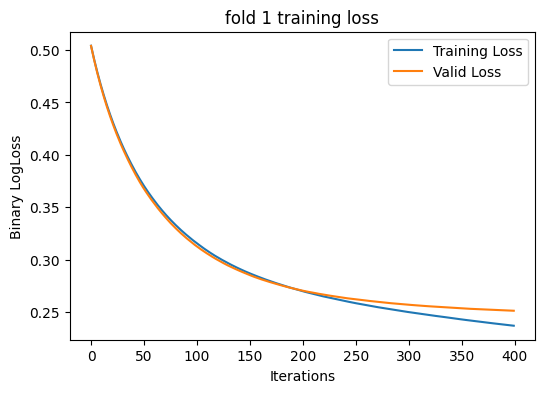

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2981
           1       0.81      0.69      0.75       774

    accuracy                           0.90      3755
   macro avg       0.86      0.83      0.84      3755
weighted avg       0.90      0.90      0.90      3755

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     26827
           1       0.83      0.71      0.77      6967

    accuracy                           0.91     33794
   macro avg       0.88      0.84      0.86     33794
weighted avg       0.91      0.91      0.91     33794

fold 2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.128190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 95669
[LightGBM] [Info] Number of data points in the train set: 33794, number of used features: 940
[LightGBM] [Info] Start training from score -0.2

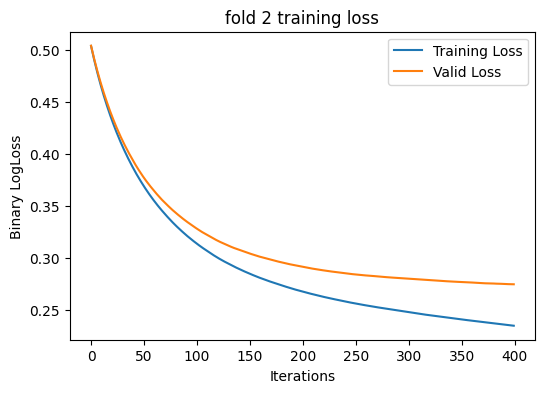

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2981
           1       0.78      0.65      0.71       774

    accuracy                           0.89      3755
   macro avg       0.85      0.80      0.82      3755
weighted avg       0.89      0.89      0.89      3755

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     26827
           1       0.83      0.71      0.77      6967

    accuracy                           0.91     33794
   macro avg       0.88      0.84      0.86     33794
weighted avg       0.91      0.91      0.91     33794

fold 3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.126906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 95563
[LightGBM] [Info] Number of data points in the train set: 33794, number of used features: 940
[LightGBM] [Info] Start training from score -0.2

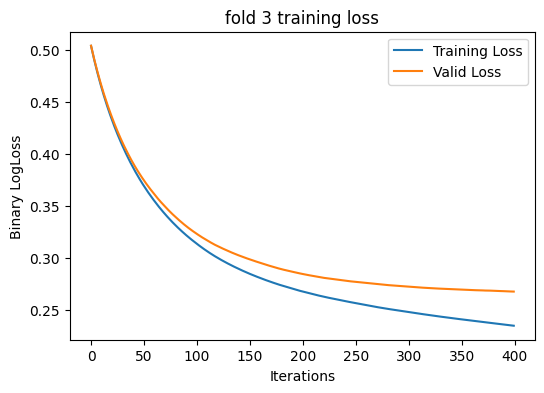

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2981
           1       0.79      0.67      0.73       774

    accuracy                           0.90      3755
   macro avg       0.86      0.81      0.83      3755
weighted avg       0.89      0.90      0.89      3755

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     26827
           1       0.83      0.71      0.77      6967

    accuracy                           0.91     33794
   macro avg       0.88      0.84      0.86     33794
weighted avg       0.91      0.91      0.91     33794

fold 4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.124416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 95610
[LightGBM] [Info] Number of data points in the train set: 33794, number of used features: 940
[LightGBM] [Info] Start training from score -0.2

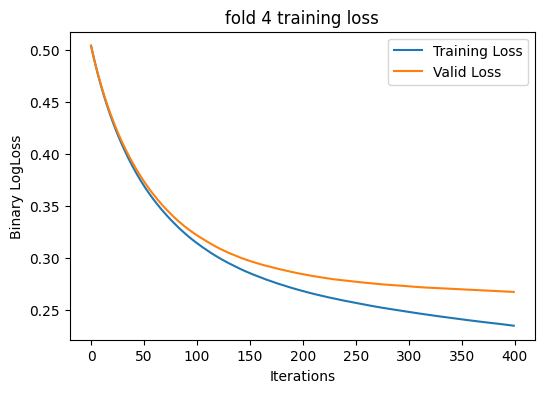

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2981
           1       0.78      0.68      0.72       774

    accuracy                           0.89      3755
   macro avg       0.85      0.81      0.83      3755
weighted avg       0.89      0.89      0.89      3755

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     26827
           1       0.83      0.72      0.77      6967

    accuracy                           0.91     33794
   macro avg       0.88      0.84      0.86     33794
weighted avg       0.91      0.91      0.91     33794

fold 5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.129525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 95593
[LightGBM] [Info] Number of data points in the train set: 33794, number of used features: 940
[LightGBM] [Info] Start training from score -0.2

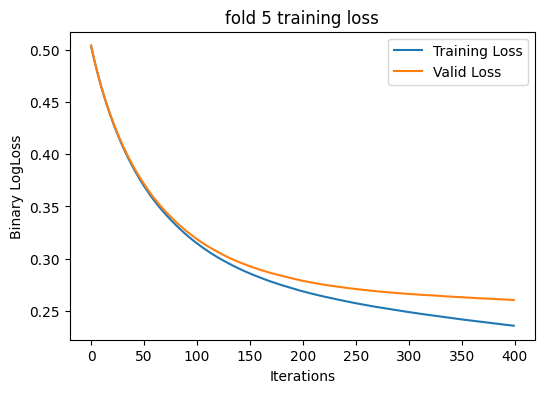

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2981
           1       0.78      0.69      0.73       774

    accuracy                           0.90      3755
   macro avg       0.85      0.82      0.83      3755
weighted avg       0.89      0.90      0.89      3755

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     26827
           1       0.83      0.71      0.77      6967

    accuracy                           0.91     33794
   macro avg       0.88      0.84      0.86     33794
weighted avg       0.91      0.91      0.91     33794

fold 6
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.132593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 95629
[LightGBM] [Info] Number of data points in the train set: 33794, number of used features: 940
[LightGBM] [Info] Start training from score -0.2

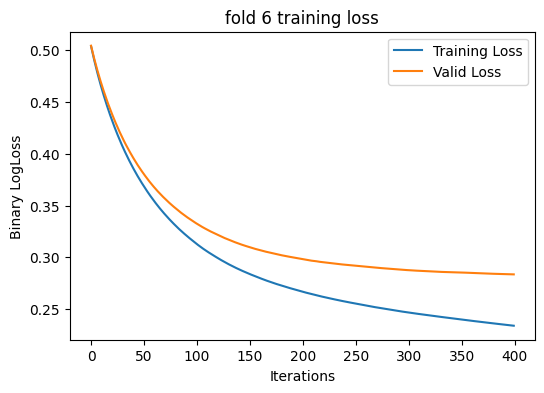

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2981
           1       0.75      0.65      0.70       774

    accuracy                           0.88      3755
   macro avg       0.83      0.80      0.81      3755
weighted avg       0.88      0.88      0.88      3755

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     26827
           1       0.83      0.72      0.77      6967

    accuracy                           0.91     33794
   macro avg       0.88      0.84      0.86     33794
weighted avg       0.91      0.91      0.91     33794

fold 7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.154845 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 95625
[LightGBM] [Info] Number of data points in the train set: 33794, number of used features: 940
[LightGBM] [Info] Start training from score -0.2

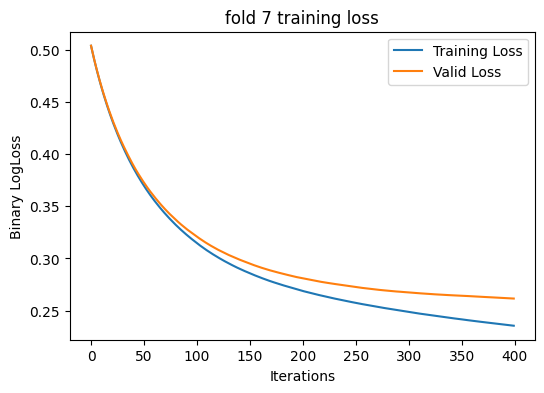

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2981
           1       0.80      0.69      0.74       774

    accuracy                           0.90      3755
   macro avg       0.86      0.82      0.84      3755
weighted avg       0.90      0.90      0.90      3755

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     26827
           1       0.83      0.72      0.77      6967

    accuracy                           0.91     33794
   macro avg       0.88      0.84      0.86     33794
weighted avg       0.91      0.91      0.91     33794

fold 8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.140863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 95639
[LightGBM] [Info] Number of data points in the train set: 33794, number of used features: 940
[LightGBM] [Info] Start training from score -0.2

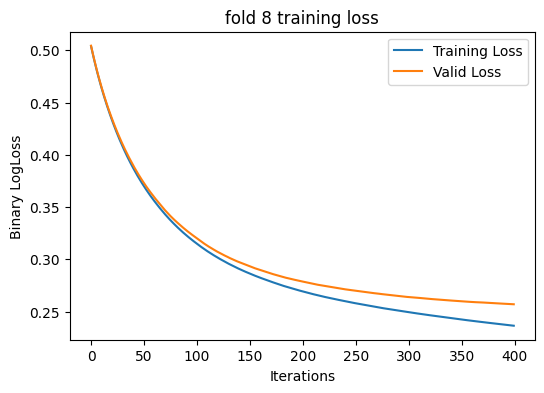

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2980
           1       0.82      0.69      0.75       775

    accuracy                           0.90      3755
   macro avg       0.87      0.82      0.84      3755
weighted avg       0.90      0.90      0.90      3755

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     26828
           1       0.83      0.72      0.77      6966

    accuracy                           0.91     33794
   macro avg       0.88      0.84      0.86     33794
weighted avg       0.91      0.91      0.91     33794

fold 9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.132605 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 95649
[LightGBM] [Info] Number of data points in the train set: 33795, number of used features: 940
[LightGBM] [Info] Start training from score -0.2

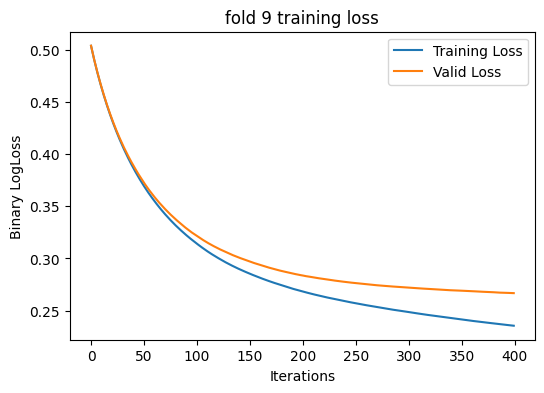

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2980
           1       0.77      0.70      0.73       774

    accuracy                           0.89      3754
   macro avg       0.85      0.82      0.83      3754
weighted avg       0.89      0.89      0.89      3754

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     26828
           1       0.83      0.72      0.77      6967

    accuracy                           0.91     33795
   macro avg       0.88      0.84      0.86     33795
weighted avg       0.91      0.91      0.91     33795

dev set evaluation result ============================================================
        acc score     acc_0     acc_1  label_auc_0  label_auc_1  score_auc_0  \
fold_0   0.894541  0.894541  0.894541     0.810665     0.810665     0.924514   
fold_1   0.902264  0.902264  0.902264     0.825094     0.825094     0.933757   
fold_2   0.891079  

In [50]:
sel_idx = (train_label > 0)
train_label_1 = train_label.copy()
train_label_1[sel_idx] = 1

lgb_params = {'learning_rate': 0.01, 'max_depth': -1, 'min_child_weight': 1,
            'colsample_bytree': 1, 'subsample': 1, 'reg_lambda': 0.5, 'reg_alpha': 0.5,'num_leaves':31,
            'seed': 33,'verbose':1,  'objective':'multiclass' , 'num_class': 2}
num_boost_round = 400
cv_model_1, dev_df_1, train_df_1 = lgb_cv_eval(k =10, train_data = train_data, train_label = train_label_1, 
                                         lgb_params = lgb_params, 
                                         num_boost_round = num_boost_round)

fold 0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046714 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 94611
[LightGBM] [Info] Number of data points in the train set: 6966, number of used features: 940
[LightGBM] [Info] Start training from score -0.877020
[LightGBM] [Info] Start training from score -0.537890


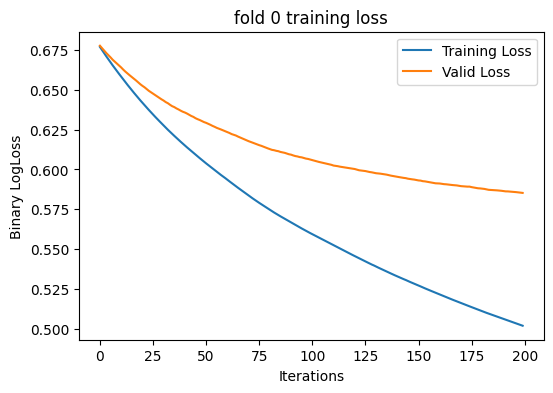

              precision    recall  f1-score   support

           0       0.66      0.54      0.59       323
           1       0.71      0.80      0.75       452

    accuracy                           0.69       775
   macro avg       0.68      0.67      0.67       775
weighted avg       0.69      0.69      0.68       775

              precision    recall  f1-score   support

           0       0.81      0.68      0.74      2898
           1       0.79      0.89      0.84      4068

    accuracy                           0.80      6966
   macro avg       0.80      0.78      0.79      6966
weighted avg       0.80      0.80      0.80      6966

fold 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049542 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 94678
[LightGBM] [Info] Number of data points in the train set: 6967, number of used features: 940
[LightGBM] [Info] Start training from score -0.87

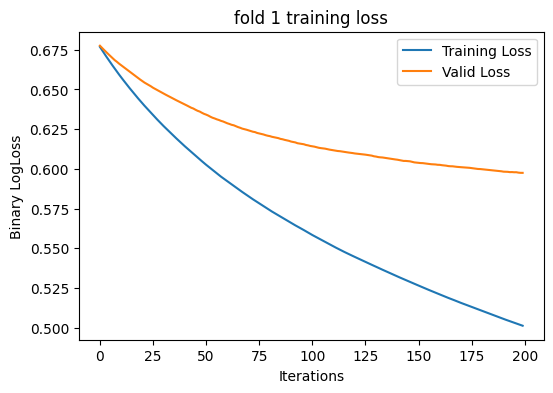

              precision    recall  f1-score   support

           0       0.65      0.50      0.56       322
           1       0.69      0.81      0.75       452

    accuracy                           0.68       774
   macro avg       0.67      0.65      0.66       774
weighted avg       0.68      0.68      0.67       774

              precision    recall  f1-score   support

           0       0.81      0.68      0.74      2899
           1       0.80      0.89      0.84      4068

    accuracy                           0.80      6967
   macro avg       0.80      0.78      0.79      6967
weighted avg       0.80      0.80      0.80      6967

fold 2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 94656
[LightGBM] [Info] Number of data points in the train set: 6967, number of used features: 940
[LightGBM] [Info] Start training from score -0.87

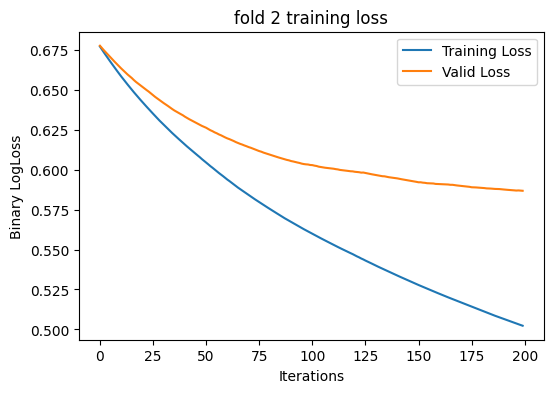

              precision    recall  f1-score   support

           0       0.64      0.53      0.58       322
           1       0.70      0.79      0.74       452

    accuracy                           0.68       774
   macro avg       0.67      0.66      0.66       774
weighted avg       0.68      0.68      0.68       774

              precision    recall  f1-score   support

           0       0.80      0.67      0.73      2899
           1       0.79      0.88      0.83      4068

    accuracy                           0.80      6967
   macro avg       0.80      0.78      0.78      6967
weighted avg       0.80      0.80      0.79      6967

fold 3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 94672
[LightGBM] [Info] Number of data points in the train set: 6967, number of used features: 940
[LightGBM] [Info] Start training from score -0.87

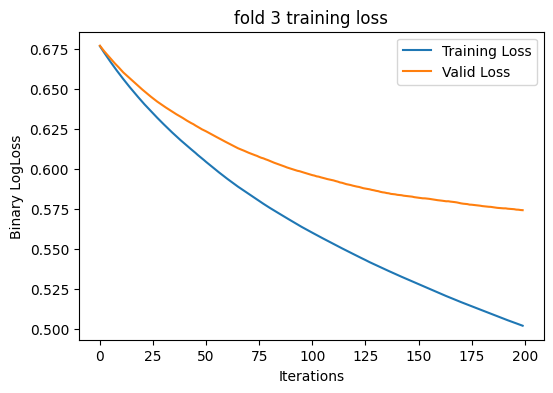

              precision    recall  f1-score   support

           0       0.63      0.51      0.57       322
           1       0.69      0.79      0.74       452

    accuracy                           0.67       774
   macro avg       0.66      0.65      0.65       774
weighted avg       0.67      0.67      0.67       774

              precision    recall  f1-score   support

           0       0.82      0.67      0.73      2899
           1       0.79      0.89      0.84      4068

    accuracy                           0.80      6967
   macro avg       0.80      0.78      0.79      6967
weighted avg       0.80      0.80      0.79      6967

fold 4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 94667
[LightGBM] [Info] Number of data points in the train set: 6967, number of used features: 940
[LightGBM] [Info] Start training from score -0.87

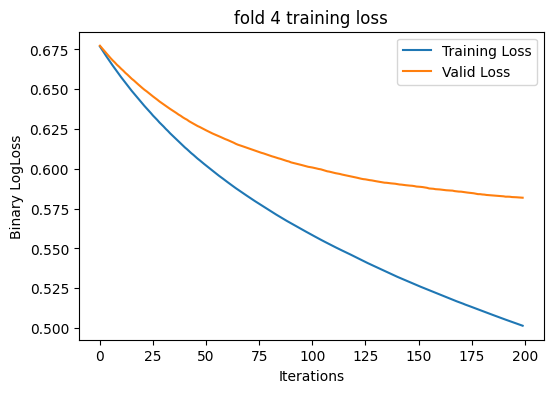

              precision    recall  f1-score   support

           0       0.63      0.52      0.57       322
           1       0.69      0.78      0.73       452

    accuracy                           0.67       774
   macro avg       0.66      0.65      0.65       774
weighted avg       0.67      0.67      0.66       774

              precision    recall  f1-score   support

           0       0.82      0.67      0.74      2899
           1       0.79      0.90      0.84      4068

    accuracy                           0.80      6967
   macro avg       0.81      0.78      0.79      6967
weighted avg       0.80      0.80      0.80      6967

fold 5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 94504
[LightGBM] [Info] Number of data points in the train set: 6967, number of used features: 940
[LightGBM] [Info] Start training from score -0.87

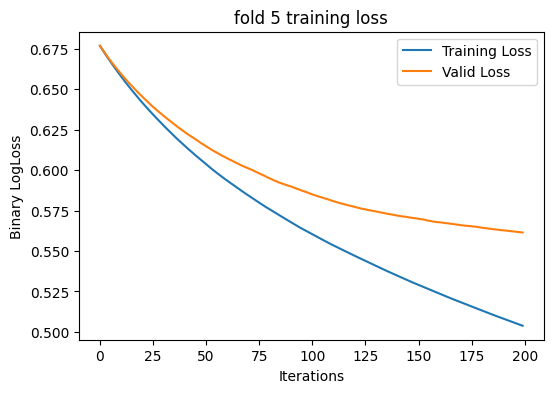

              precision    recall  f1-score   support

           0       0.70      0.57      0.63       322
           1       0.73      0.83      0.77       452

    accuracy                           0.72       774
   macro avg       0.71      0.70      0.70       774
weighted avg       0.72      0.72      0.71       774

              precision    recall  f1-score   support

           0       0.81      0.66      0.73      2899
           1       0.79      0.89      0.83      4068

    accuracy                           0.79      6967
   macro avg       0.80      0.77      0.78      6967
weighted avg       0.80      0.79      0.79      6967

fold 6
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 94633
[LightGBM] [Info] Number of data points in the train set: 6967, number of used features: 940
[LightGBM] [Info] Start training from score -0.87

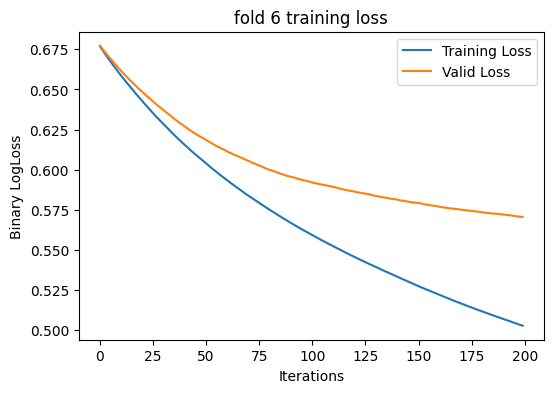

              precision    recall  f1-score   support

           0       0.67      0.57      0.62       322
           1       0.72      0.80      0.76       452

    accuracy                           0.70       774
   macro avg       0.70      0.68      0.69       774
weighted avg       0.70      0.70      0.70       774

              precision    recall  f1-score   support

           0       0.81      0.66      0.73      2899
           1       0.79      0.89      0.83      4068

    accuracy                           0.79      6967
   macro avg       0.80      0.78      0.78      6967
weighted avg       0.80      0.79      0.79      6967

fold 7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 94752
[LightGBM] [Info] Number of data points in the train set: 6967, number of used features: 940
[LightGBM] [Info] Start training from score -0.87

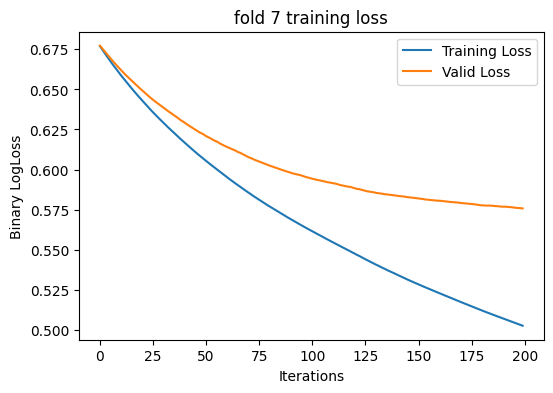

              precision    recall  f1-score   support

           0       0.67      0.52      0.59       322
           1       0.71      0.82      0.76       452

    accuracy                           0.70       774
   macro avg       0.69      0.67      0.67       774
weighted avg       0.69      0.70      0.69       774

              precision    recall  f1-score   support

           0       0.82      0.66      0.73      2899
           1       0.79      0.89      0.84      4068

    accuracy                           0.80      6967
   macro avg       0.80      0.78      0.78      6967
weighted avg       0.80      0.80      0.79      6967

fold 8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 94633
[LightGBM] [Info] Number of data points in the train set: 6967, number of used features: 940
[LightGBM] [Info] Start training from score -0.87

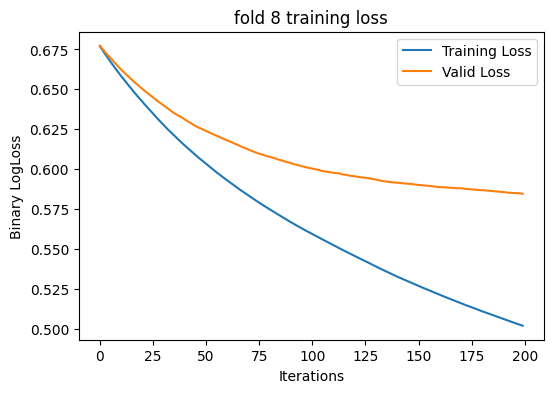

              precision    recall  f1-score   support

           0       0.66      0.53      0.59       322
           1       0.70      0.80      0.75       452

    accuracy                           0.69       774
   macro avg       0.68      0.67      0.67       774
weighted avg       0.68      0.69      0.68       774

              precision    recall  f1-score   support

           0       0.82      0.67      0.74      2899
           1       0.79      0.89      0.84      4068

    accuracy                           0.80      6967
   macro avg       0.80      0.78      0.79      6967
weighted avg       0.80      0.80      0.80      6967

fold 9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 94641
[LightGBM] [Info] Number of data points in the train set: 6967, number of used features: 940
[LightGBM] [Info] Start training from score -0.87

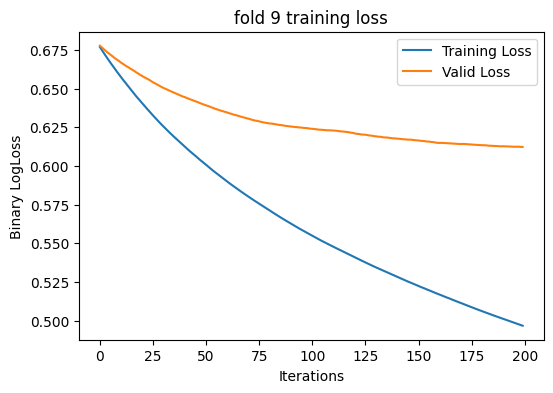

              precision    recall  f1-score   support

           0       0.57      0.44      0.50       322
           1       0.66      0.76      0.70       452

    accuracy                           0.63       774
   macro avg       0.61      0.60      0.60       774
weighted avg       0.62      0.63      0.62       774

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      2899
           1       0.79      0.89      0.84      4068

    accuracy                           0.80      6967
   macro avg       0.80      0.78      0.78      6967
weighted avg       0.80      0.80      0.79      6967

dev set evaluation result ============================================================
        acc score     acc_0     acc_1  label_auc_0  label_auc_1  score_auc_0  \
fold_0   0.690323  0.690323  0.690323     0.669128     0.669128     0.746774   
fold_1   0.679587  0.679587  0.679587     0.653761     0.653761     0.728062   
fold_2   0.680879  

In [51]:
sel_idx = (train_label > 0)
train_label_2 = train_label[sel_idx] - 1
train_data_2 = train_data[sel_idx]
lgb_params = {'learning_rate': 0.01, 'max_depth': -1, 'min_child_weight': 1,
            'colsample_bytree': 1, 'subsample': 1, 'reg_lambda': 0.5, 'reg_alpha': 0.5,'num_leaves':31,
            'seed': 33,'verbose':1,  'objective':'multiclass' , 'num_class': 2}
num_boost_round = 200
cv_model_2, dev_df_2, train_df_2 = lgb_cv_eval(k =10, train_data = train_data_2, train_label = train_label_2, 
                                         lgb_params = lgb_params, 
                                         num_boost_round = num_boost_round)

In [52]:
skf = StratifiedKFold(n_splits=10, shuffle = True, random_state=42)

for k, (train_idx, dev_idx) in enumerate(skf.split(train_data, train_label)):
    train_X = train_data[train_idx,:]
    train_y = train_label[train_idx]

    dev_X = train_data[dev_idx,:]
    dev_y = train_label[dev_idx]
    
    lgb_train = lgb.Dataset(train_X, train_y)
    lgb_dev = lgb.Dataset(dev_X, dev_y, reference=lgb_train)

    gbm_1 = cv_model_1[k]
    gbm_2 = cv_model_2[k]
    pred_label = np.ones(dev_X.shape[0], dtype=np.int16)

    res_1 = gbm_1.predict(dev_X)
    res_2 = gbm_2.predict(dev_X)
    for i,_ in enumerate(pred_label):
        if res_1[i,0] > 0.5:
            pred_label[i] = 0 
        else:
            if res_2[i,1] > 0.5:
                pred_label[i] = 2 
    
    print(f'fold {k}: {accuracy_score(dev_y, pred_label)}')

fold 0: 0.8745672436750999
fold 1: 0.8753661784287616
fold 2: 0.8687083888149134
fold 3: 0.8721704394141145
fold 4: 0.8644474034620506
fold 5: 0.8750998668442077
fold 6: 0.8641810918774967
fold 7: 0.870572569906791
fold 8: 0.8822902796271638
fold 9: 0.8649440596696857


In [53]:
final_res = 0
for t in range(10):
    gbm_1 = cv_model_1[t]
    gbm_2 = cv_model_2[t]
    pred_label = np.ones((test_data.shape[0],1), dtype=np.int16)

    joint_res = np.empty(shape = (test_data.shape[0],3))
    res_1 = gbm_1.predict(test_data)
    res_2 = gbm_2.predict(test_data)
    joint_res[:,0] = res_1[:,0]
    joint_res[:,1] = res_1[:,1]*res_2[:,0]
    joint_res[:,2] = res_1[:,1]*res_2[:,1]
    final_res += joint_res 
    for i,_ in enumerate(pred_label):
        if res_1[i,0] > 0.5:
            pred_label[i,0] = 0 
        else:
            if res_2[i,1] > 0.5:
                pred_label[i,0] = 2 
    if t == 0:
        record = pred_label
    else:
        record = np.concatenate([record, pred_label], axis = 1)
final_res = final_res/10
print(record.shape)

(1155, 10)


In [54]:
majority_predictions = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=record)
print(majority_predictions.shape)
for i in range(3):
    print((majority_predictions == i).sum())

(1155,)
732
253
170


In [56]:
pred_label = np.argmax(final_res, axis = 1)
for i in range(3):
    print((pred_label == i).sum())

803
219
133


In [57]:
pred_label = np.array([2]*test_data.shape[0])

top_385_indices = final_res[:,0].argsort()[::-1][:385]
pred_label[top_385_indices] = 0

tmp_res = final_res.copy()
tmp_res[top_385_indices,1] = 0

top_385_indices = tmp_res[:,1].argsort()[::-1][:385]
pred_label[top_385_indices] = 1

for _ in np.unique(pred_label):
    print(f'{_}: {(pred_label == _).sum()}')

sample_submit.loc[:,'label'] = pred_label 
sample_submit.to_csv('res_10.csv')

0: 385
1: 385
2: 385
